# Import necessary Libraries



In [90]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.svm import SVR


# Task 1: Data Exploration and Visualization

### a.Load The Dataset


In [91]:
th = pd.read_csv(r'D:\Machine Learning\Final Exam\Project\visitor_count_dataset - visitor_count_dataset.csv') 

### Display the first 5 rows


In [92]:
th.head()


,time_segment,VisitorCount,DayOfWeek,is_official_holiday,is_school_holiday,is_bridge_day,Weekday,Month,Winter,Spring,...,Autumn,after_holiday,after_bridge,after_school_holiday,precip_quantity,temp_avg,wind_speed_10m,humidity_rel_shelter_avg,pressure,sun_duration
0,AfterNoor,46,Friday,0,1,0,4,1,1,0,...,0,0,0,0,0.12,3.90,2.48,92.28,1037.73,0.0
1,Morning,123,Friday,0,1,0,4,1,1,0,...,0,0,0,0,0.12,3.90,2.48,92.28,1037.73,0.0
2,Noon,83,Friday,0,1,0,4,1,1,0,...,0,0,0,0,0.12,3.90,2.48,92.28,1037.73,0.0
3,Morning,100,Saturday,0,1,0,5,1,1,0,...,0,0,0,1,2.52,5.92,3.50,97.87,1033.61,0.0
4,Noon,84,Saturday,0,1,0,5,1,1,0,...,0,0,0,1,2.52,5.92,3.50,97.87,1033.61,0.0


### b.Display summary statistics of the

In [93]:
th.describe()

,VisitorCount,is_official_holiday,is_school_holiday,is_bridge_day,Weekday,Month,Winter,Spring,Summer,Autumn,after_holiday,after_bridge,after_school_holiday,precip_quantity,temp_avg,wind_speed_10m,humidity_rel_shelter_avg,pressure,sun_duration
count,8041.000000,8041.0,8041.000000,8041.000000,8041.000000,8041.000000,8041.000000,8041.000000,8040.000000,8041.000000,8041.0,8041.000000,8041.000000,8036.000000,8036.000000,8037.000000,8036.000000,8036.000000,8036.000000
mean,59.833478,0.0,0.281681,0.010571,2.406417,6.410024,0.241015,0.259296,0.264303,0.235418,0.0,0.010571,0.280562,2.354654,12.105071,2.917739,80.672359,1016.056378,322.722438
std,26.958024,0.0,0.449847,0.102276,1.725642,3.389902,0.427726,0.438276,0.440989,0.424286,0.0,0.102276,0.449302,4.832911,6.161857,1.535865,14.394162,100.996320,290.774276
min,1.000000,0.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,-5.740000,0.750000,41.790000,976.070000,0.000000
25%,40.000000,0.0,0.000000,0.000000,1.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,7.520000,1.950000,72.865000,1009.020000,55.622500
50%,57.000000,0.0,0.000000,0.000000,2.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.120000,11.750000,2.640000,82.400000,1015.525000,278.170000
75%,76.000000,0.0,1.000000,0.000000,4.000000,9.000000,0.000000,1.000000,1.000000,0.000000,0.0,0.000000,1.000000,2.510000,17.080000,3.660000,89.400000,1021.430000,540.542500
max,191.000000,0.0,1.000000,1.000000,5.000000,12.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,42.170000,28.390000,73.550000,874.850000,10024.430000,8483.830000


### c.Check for missing values

In [94]:

th.isnull().sum()


time_segment                0
VisitorCount                0
DayOfWeek                   0
is_official_holiday         0
is_school_holiday           0
is_bridge_day               0
Weekday                     0
Month                       0
Winter                      0
Spring                      0
Summer                      1
Autumn                      0
after_holiday               0
after_bridge                0
after_school_holiday        0
precip_quantity             5
temp_avg                    5
wind_speed_10m              4
humidity_rel_shelter_avg    5
pressure                    5
sun_duration                5
dtype: int64

### d.Plot the distribution of any 2 numerical and 2 categorical features

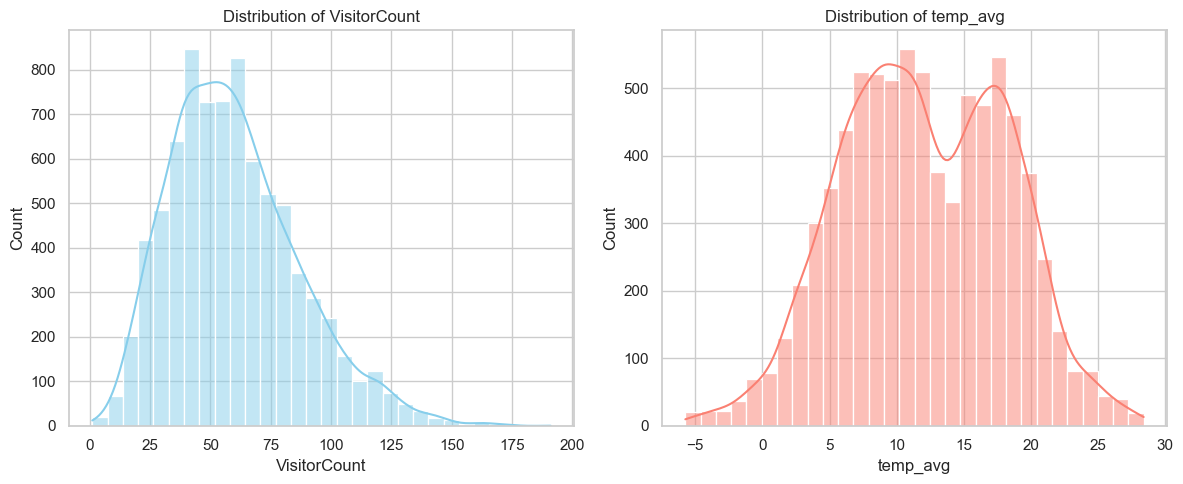

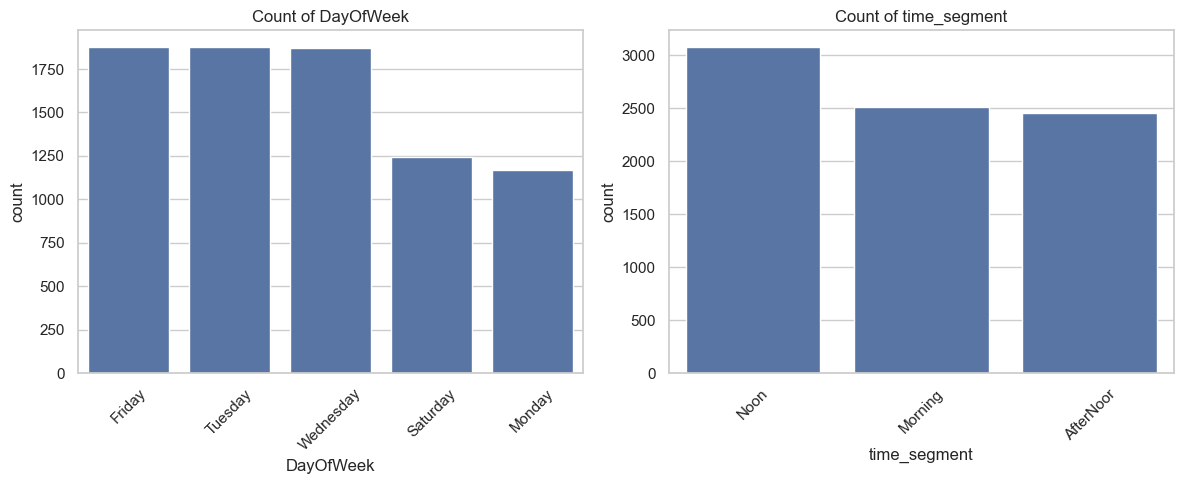

In [95]:

# Set plot style
sns.set(style='whitegrid')

# Plot numerical features
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.histplot(th['VisitorCount'], kde=True, bins=30, color='skyblue')
plt.title('Distribution of VisitorCount')

plt.subplot(1, 2, 2)
sns.histplot(th['temp_avg'], kde=True, bins=30, color='salmon')
plt.title('Distribution of temp_avg')

plt.tight_layout()
plt.show()

# Plot categorical features
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.countplot(x='DayOfWeek', data=th, order=th['DayOfWeek'].value_counts().index)
plt.title('Count of DayOfWeek')
plt.xticks(rotation=45)

plt.subplot(1, 2, 2)
sns.countplot(x='time_segment', data=th, order=th['time_segment'].value_counts().index)
plt.title('Count of time_segment')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


###  e.Plot the correlation matrix (heatmap) among numerical features

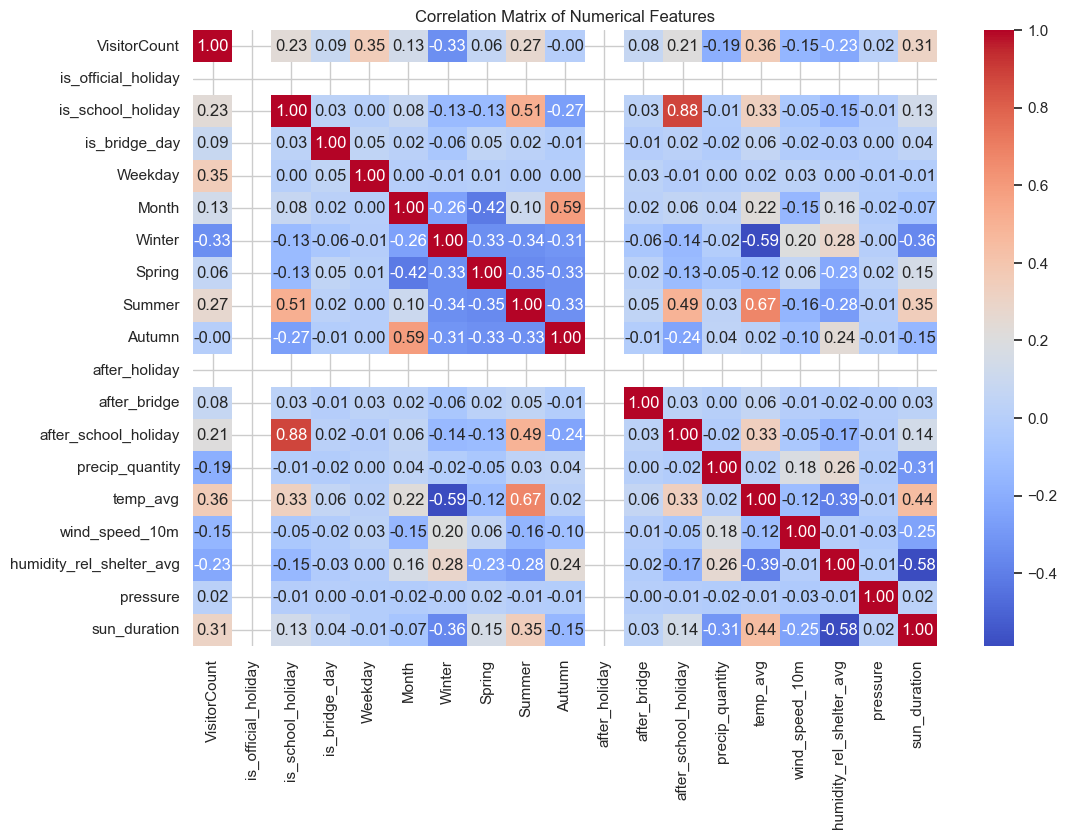

In [96]:

# Selecting only numerical columns
numerical_cols = th.select_dtypes(include=['int64', 'float64'])

# Computing correlation matrix
corr_matrix = numerical_cols.corr()

# Plotting heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Numerical Features')
plt.show()


# Task 2: Data Preprocessing and feature engineering

### a.Handle missing values and outliers

In [97]:
#Handle missing values (imputation)
th.fillna(th.mean(numeric_only=True), inplace=True)

In [98]:
# Remove outliers using IQR method
numerical_cols = th.select_dtypes(include=['int64', 'float64']).columns

for col in numerical_cols:
    Q1 = th[col].quantile(0.25)
    Q3 = th[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    th = th[(th[col] >= lower) & (th[col] <= upper)]


### b.Show best 5 features using feature selection techniques

In [99]:

# Encode categorical variables temporarily for correlation & selection
th_encoded = pd.get_dummies(th, drop_first=True)

X = th_encoded.drop('VisitorCount', axis=1)
y = th_encoded['VisitorCount']

# 1. Correlation
correlation = X.corrwith(y).abs().sort_values(ascending=False)

# 2. Feature importance using Random Forest
rf = RandomForestRegressor(random_state=42)
rf.fit(X, y)
importances = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)

# 3. SelectKBest
k_best = SelectKBest(score_func=f_regression, k=5)
k_best.fit(X, y)
kbest_scores = pd.Series(k_best.scores_, index=X.columns).sort_values(ascending=False)

# Combine top 5 from each method
top_features = pd.DataFrame({
    'Correlation': correlation.head(5),
    'RandomForest': importances.head(5),
    'SelectKBest': kbest_scores.head(5)
})

top_features


c:\Users\admin\AppData\Local\Programs\Python\Python313\Lib\site-packages\numpy\lib\_function_base_impl.py:3063: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\admin\AppData\Local\Programs\Python\Python313\Lib\site-packages\numpy\lib\_function_base_impl.py:3064: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


,Correlation,RandomForest,SelectKBest
DayOfWeek_Saturday,0.464297,0.128419,1325.424530
DayOfWeek_Tuesday,0.290592,NaN,444.837251
DayOfWeek_Wednesday,0.207826,NaN,217.717764
Weekday,0.373140,0.153133,780.147725
humidity_rel_shelter_avg,NaN,0.071129,NaN
sun_duration,NaN,0.073769,NaN
temp_avg,NaN,0.161096,NaN
time_segment_Morning,0.210172,NaN,222.888403


### c. Encode categorical variables

In [100]:
# One-hot encoding for categorical variables
th = pd.get_dummies(th, columns=['DayOfWeek', 'time_segment'], drop_first=True)


### d. Normalize/standardize numerical features

In [101]:

# Select numeric columns excluding target
num_cols = th.select_dtypes(include=['float64', 'int64']).drop('VisitorCount', axis=1).columns

# Standardize the selected columns
scaler = StandardScaler()
th[num_cols] = scaler.fit_transform(th[num_cols])


###  e.Split the dataset into training and testing sets

In [102]:

# Define features and label
X = th.drop('VisitorCount', axis=1)
y = th['VisitorCount']

# Train-test split (80-20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Task 3: Model Building and Evaluation

### a.Train 4 Regression Models

In [ ]:
# Initialize models
lr_model = LinearRegression()
rf_model = RandomForestRegressor(random_state=42)
svr_model = SVR()
xgb_model = XGBRegressor(random_state=42)

# Train the models
lr_model.fit(X_train, y_train)
rf_model.fit(X_train, y_train)
svr_model.fit(X_train, y_train)
xgb_model.fit(X_train, y_train)


### b. Evaluate the models using MSE and R² Score

In [ ]:

# Predictions
lr_preds = lr_model.predict(X_test)
rf_preds = rf_model.predict(X_test)
svr_preds = svr_model.predict(X_test)
xgb_preds = xgb_model.predict(X_test)

# Evaluation
lr_mse = mean_squared_error(y_test, lr_preds)
rf_mse = mean_squared_error(y_test, rf_preds)
svr_mse = mean_squared_error(y_test, svr_preds)
xgb_mse = mean_squared_error(y_test, xgb_preds)

lr_r2 = r2_score(y_test, lr_preds)
rf_r2 = r2_score(y_test, rf_preds)
svr_r2 = r2_score(y_test, svr_preds)
xgb_r2 = r2_score(y_test, xgb_preds)

# Display Results
print("Linear Regression:")
print(f"  MSE: {lr_mse:.2f}")
print(f"  R2 Score: {lr_r2:.4f}")

print("\nRandom Forest Regression:")
print(f"  MSE: {rf_mse:.2f}")
print(f"  R2 Score: {rf_r2:.4f}")

print("\nSupport Vector Regression:")
print(f"  MSE: {svr_mse:.2f}")
print(f"  R2 Score: {svr_r2:.4f}")

print("\nXGBoost Regression:")
print(f"  MSE: {xgb_mse:.2f}")
print(f"  R2 Score: {xgb_r2:.4f}")


Linear Regression:
  MSE: 348.44
  R2 Score: 0.3894

Random Forest Regression:
  MSE: 244.21
  R2 Score: 0.5720

Support Vector Regression:
  MSE: 338.18
  R2 Score: 0.4073

XGBoost Regression:
  MSE: 233.95
  R2 Score: 0.5900


### c. Plot the result comparison for both models

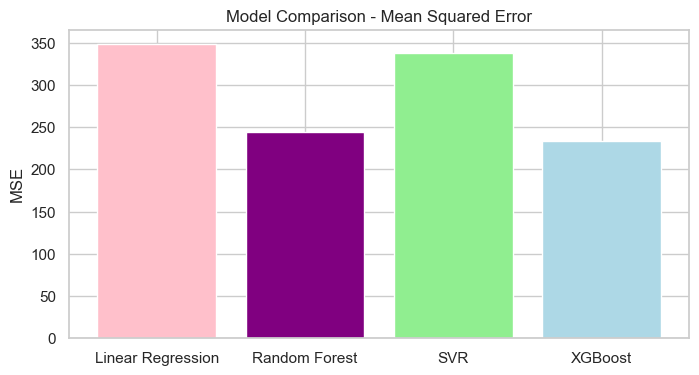

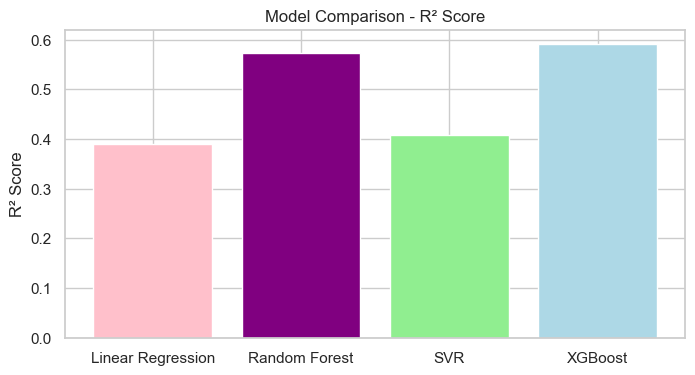

In [ ]:


# MSE Comparison
plt.figure(figsize=(8, 4))
plt.bar(['Linear Regression', 'Random Forest', 'SVR', 'XGBoost'], [lr_mse, rf_mse, svr_mse, xgb_mse], color=['pink', 'purple', 'lightgreen', 'lightblue'])
plt.title('Model Comparison - Mean Squared Error')
plt.ylabel('MSE')
plt.show()

# R2 Score Comparison
plt.figure(figsize=(8, 4))
plt.bar(['Linear Regression', 'Random Forest', 'SVR', 'XGBoost'], [lr_r2, rf_r2, svr_r2, xgb_r2], color=['pink', 'purple', 'lightgreen', 'lightblue'])
plt.title('Model Comparison - R² Score')
plt.ylabel('R² Score')
plt.show()


### d. Explanation

Based on the model evaluations:

**XGBoost Regression** is the most appropriate model for predicting **VisitorCount** because it has the **lowest MSE (233.95)** and the **highest R² score (0.5900)** among all models. This means it makes the most accurate predictions and explains the highest amount of variance in the data, outperforming Linear Regression, Random Forest, and SVR.


# Task 5: Conclusion and Recommendations

### a. short conclusion summarizing my findings.

In this project, we explored and preprocessed a visitor count dataset, engineered relevant features, and trained four regression models: Linear Regression, Random Forest, Support Vector Regression (SVR), and XGBoost. Through comprehensive evaluation using Mean Squared Error (MSE) and R² score, we found that XGBoost Regression outperformed the other models, achieving the lowest prediction error and the highest explanatory power. This indicates that advanced ensemble methods like XGBoost are highly effective for capturing complex patterns in visitor data, making them suitable for accurate forecasting in similar real-world scenarios. The results also highlight the importance of thorough data preprocessing and model comparison to identify the best predictive approach.

### b.Rcommendations that could help with more precise prediction based on analysis.

1. Try to collect more information, like details about the weather, special events, or holidays, because these can affect how many people visit.
2. Use more data from previous years or months. The more data you have, the better the model can learn and predict.
3. Create new features, such as combining existing ones or adding information about what happened on previous days, to help the model find patterns.
4. Test different settings for each model (like the number of trees in Random Forest or XGBoost) to see which works best.
5. If the data changes over time, try using models made for time series, like ARIMA or LSTM, to capture trends and seasonality.
6. If there are days with very few visitors (like rare holidays), use special techniques to make sure the model learns about these cases too.